In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [2]:
path = '../9.데이터/ECG/'

In [3]:
# 데이터 불러오기
data_normal = pd.read_csv(path + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(path + 'ptbdb_abnormal.csv')

# 데이터 배열화
data_normal = np.array(data_normal)
data_abnormal = np.array(data_abnormal)

(4045, 188)
(10505, 188)


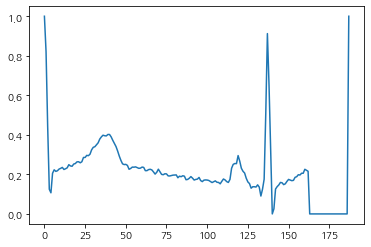

In [4]:
# 데이터 확인
print(data_normal.shape)
print(data_abnormal.shape)

plt.plot(data_abnormal[38,:])

In [5]:
# 데이터의 마지막에 존재하는 noise 값 제거를 위한 끝단 데이터 10개 제거
data_normal = data_normal[:,:data_normal.shape[1]-10]
data_abnormal = data_abnormal[:,:data_abnormal.shape[1]-10]

In [6]:
# 정상과 비정상의 데이터 개수를 맞추기 및 Train, Test 데이터 생성
nTrain = 3000
nTest = 1000
x_train = np.concatenate((data_normal[:nTrain,:], data_abnormal[:nTrain,:]),0)
y_train = np.concatenate((np.zeros(nTrain), np.ones(nTrain)),0)
x_test = np.concatenate((data_normal[nTrain:nTrain+nTest,:], data_abnormal[nTrain:nTrain+nTest,:]),0)
y_test = np.concatenate((np.zeros(nTest), np.ones(nTest)),0)

In [7]:
# 원핫인코딩 수행
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

# 데이터 차원 추가
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [8]:
# 모델 구조 생성 및 컴파일 및 학습진행

model = Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, input_shape=(x_train.shape[1],1), activation = 'relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation = 'relu'))
model.add(layers.MaxPooling1D(pool_size = 3, strides=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, input_shape=(x_train.shape[1],1), activation = 'relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation = 'relu'))
model.add(layers.MaxPooling1D(pool_size = 3, strides=2))
model.add(layers.Bidirectional(layers.LSTM(16)))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs = 50, batch_size=128, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 176, 16)           64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 174, 16)           784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 86, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 84, 32)            1568      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 82, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 40, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                6

38/38 [==============================] - 0s 7ms/step - loss: 0.0719 - accuracy: 0.9725 - val_loss: 0.1367 - val_accuracy: 0.9483
Epoch 50/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.1973 - val_accuracy: 0.9358


In [9]:
# 모델 검증
o = model.predict(x_test)
o = np.argmax(o,1)
y_test = np.argmax(y_test,1)

sum(np.equal(y_test, o)/len(y_test))

0.9669999999999489